In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import glob
from datetime import datetime
from scipy.optimize import curve_fit

# Discharge Data Processing (Shibsa-DS-Spring Tide)

In [ ]:
file_path = r"..\Dry_Season_Discharge\Shibsa DS Spring.xlsx"
df = pd.read_excel(file_path)
df

C:\Users\mji.IWMDC0\.conda\envs\data_env\lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Discharge Profile(BT) '!$A:$N.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


,Discharge Observation at Shibsa ds (Spring),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,River: Shibsa River,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Station: Nonial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Start Position (UTM),NaN,NaN,End Position (UTM),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Date: 27-04-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Easting:750558 m E,NaN,NaN,Easting:748764 m E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northing:2486198 m N,NaN,NaN,Northing:2486171 m N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Date,Time,Discharge\n(m3/s),Velocity\n(m/s),Flow Dir. (Degree),Time,Water Level (m MSL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2025-04-27 00:00:00,05:59:24,8305.013,0.789,175.08,06:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Flood Max,23189.312
6,2025-04-27 00:00:00,06:29:26,4026.601,0.351,172.69,06:30:00,-2.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ebb Max,17333.555
7,2025-04-27 00:00:00,07:00:15,-2328.49,-0.32,6.89,07:00:00,-2.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2025-04-27 00:00:00,08:00:13,-18480.798,-1.379,356.63,07:30:00,-1.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2025-04-27 00:00:00,09:00:51,-23189.312,-1.435,358.08,08:00:00,-0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
q_df = df.iloc[4:,:4]
q_df.reset_index(drop = True, inplace = True)
q_df.columns = q_df.iloc[0, :4]
q_df.drop(0, inplace=True)
q_df.rename(columns={"Discharge\n(m3/s)": "Discharge (m3/s)", "Velocity\n(m/s)": "Velocity (m/s)"}, inplace=True)
q_df.dropna(subset=['Discharge (m3/s)'], inplace = True)
q_df

,Date,Time,Discharge (m3/s),Velocity (m/s)
1,2025-04-27 00:00:00,05:59:24,8305.013,0.789
2,2025-04-27 00:00:00,06:29:26,4026.601,0.351
3,2025-04-27 00:00:00,07:00:15,-2328.49,-0.32
4,2025-04-27 00:00:00,08:00:13,-18480.798,-1.379
5,2025-04-27 00:00:00,09:00:51,-23189.312,-1.435
6,2025-04-27 00:00:00,09:59:10,-19284.157,-1.068
7,2025-04-27 00:00:00,10:59:44,-8982.78,-0.47
8,2025-04-27 00:00:00,12:00:20,-363.443,-0.028
9,2025-04-27 00:00:00,13:00:51,3458.312,0.229
10,2025-04-27 00:00:00,13:58:56,8064.961,0.529


In [ ]:
date_time = q_df[['Date', 'Time']].apply(lambda row: datetime.combine(row['Date'], row['Time']), axis=1)
q_df.insert(loc = 2, column = 'Date_Time', value = date_time)
q_df

,Date,Time,Date_Time,Discharge (m3/s),Velocity (m/s)
1,2025-04-27 00:00:00,05:59:24,2025-04-27 05:59:24,8305.013,0.789
2,2025-04-27 00:00:00,06:29:26,2025-04-27 06:29:26,4026.601,0.351
3,2025-04-27 00:00:00,07:00:15,2025-04-27 07:00:15,-2328.49,-0.32
4,2025-04-27 00:00:00,08:00:13,2025-04-27 08:00:13,-18480.798,-1.379
5,2025-04-27 00:00:00,09:00:51,2025-04-27 09:00:51,-23189.312,-1.435
6,2025-04-27 00:00:00,09:59:10,2025-04-27 09:59:10,-19284.157,-1.068
7,2025-04-27 00:00:00,10:59:44,2025-04-27 10:59:44,-8982.78,-0.47
8,2025-04-27 00:00:00,12:00:20,2025-04-27 12:00:20,-363.443,-0.028
9,2025-04-27 00:00:00,13:00:51,2025-04-27 13:00:51,3458.312,0.229
10,2025-04-27 00:00:00,13:58:56,2025-04-27 13:58:56,8064.961,0.529


In [ ]:
station_name = 'Nalian'
river_name = 'Sibsa'
tidal_phase = 'Spring'
mesurement_date = (q_df["Date_Time"].dt.strftime('%d-%m-%Y')).unique()[0]

Text(0.5, 1.0, 'Dry Season Discharge at Nalian in Sibsa River during Spring Tide (27-04-2025)')

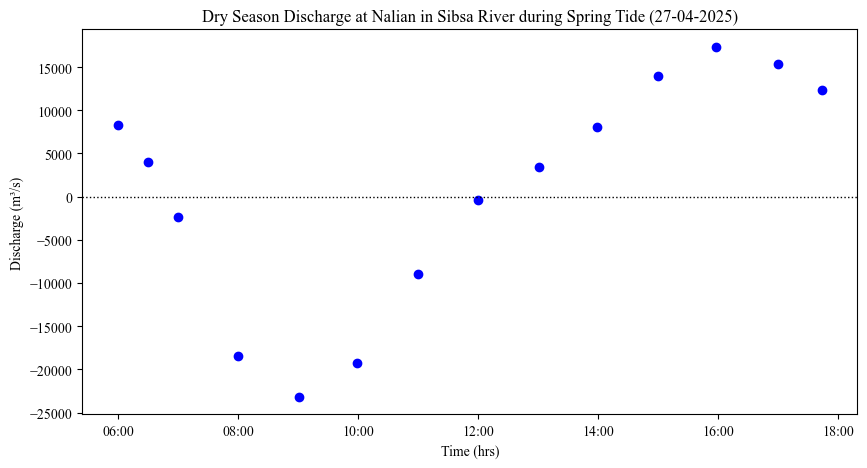

In [ ]:
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 10}

plt.rc('font', **font)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

plot1_h_axis = q_df['Date_Time']
plot1_v_axis = q_df['Discharge (m3/s)']

ax.scatter(plot1_h_axis, plot1_v_axis, marker='o', color='blue', label='Observed Discharge')
ax.axhline(0, color='black', linewidth=1, linestyle='dotted', c='black')
ax.set_xlabel('Time (hrs)')
ax.set_ylabel('Discharge (m\u00b3/s)')
time_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(time_format)
ax.set_title(f'Dry Season Discharge at {station_name} in {river_name} River during {tidal_phase} Tide ({mesurement_date})')

In [ ]:
q_df['Date_Time'] = q_df['Date_Time'].dt.round('5min')
q_df['Date_Time'] = pd.to_datetime(q_df['Date_Time'])
time_diff = q_df['Date_Time'].iloc[-1] - q_df['Date_Time'].iloc[0]
print('Total Measurement Period: ' , time_diff)
print('Available End Time: ' , q_df['Date_Time'].iloc[-1])
print('Required End Time: ' , q_df['Date_Time'].iloc[0] + pd.Timedelta(hours=12, minutes=25))

Total Measurement Period:  0 days 11:45:00
Available End Time:  2025-04-27 17:45:00
Required End Time:  2025-04-27 18:25:00


In [ ]:
def three_sine(t, a1, ω1, Φ1, a2, ω2, Φ2, a3, ω3, Φ3):
    return a1*np.sin(ω1*t + Φ1) + a2*np.sin(ω2*t + Φ2) + a3*np.sin(ω3*t + Φ3)

time = q_df['Date_Time']
t0 = time.iloc[0]
time_numeric = (time - t0).dt.total_seconds()
discharge = q_df['Discharge (m3/s)']

# Tidal frequencies initial condition
ω1 = 2 * np.pi / (12.42 * 3600)
ω2 = 2 * np.pi / (12 * 3600)
ω3 = 2 * np.pi / (23.93 * 3600)

# Initial guesses: [a1, ω1, Φ1, a2, ω2, Φ2, a3, ω3, Φ3]
initial_guess = [
    np.max(discharge)/3, ω1, 0,
    np.max(discharge)/3, ω2, 0,
    np.max(discharge)/3, ω3, 0
]

# Fit the model
coefs_three_sine, covariance_matrix_three_sine = curve_fit(three_sine, time_numeric, discharge, p0=initial_guess, maxfev=30000, method='lm')

In [ ]:
# Create smooth datetime grid (e.g., 500 points between min and max)
time_smooth_3 = pd.date_range(start=q_df['Date_Time'].min(), 
                            end=q_df['Date_Time'].max(), 
                            periods=200)

# Convert to numeric (same way as original)
time_smooth_numeric_3 = (time_smooth_3 - t0).total_seconds()

# --- Generate fitted discharge values ---
fitted_discharge_3 = three_sine(time_smooth_numeric_3, *coefs_three_sine)  # Use the best-fit parameters

In [ ]:
# Calculate predicted values on the same time points as the observed data
fitted_discharge = three_sine(time_numeric, *coefs_three_sine)  # or fixed_freq_sine(...)

# Calculate R²
ss_res = np.sum((discharge - fitted_discharge) ** 2)  # Residual sum of squares
ss_tot = np.sum((discharge - np.mean(discharge)) ** 2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.9974019747751084

Text(0.02, 0.95, 'R² = 0.9974')

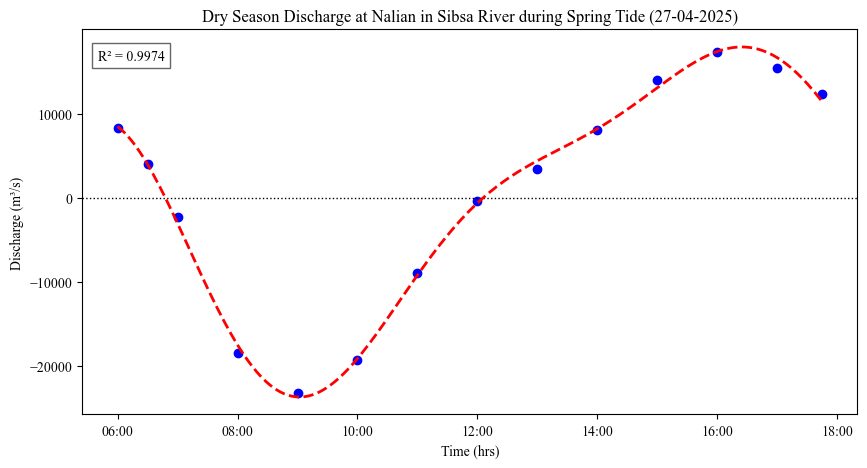

In [ ]:
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 10}

plt.rc('font', **font)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

plot1_h_axis = q_df['Date_Time']
plot1_v_axis = q_df['Discharge (m3/s)']

ax.scatter(plot1_h_axis, plot1_v_axis, marker='o', color='blue', label='Observed Discharge')
ax.axhline(0, color='black', linewidth=1, linestyle='dotted', c='black')
ax.set_xlabel('Time (hrs)')
ax.set_ylabel('Discharge (m\u00b3/s)')
time_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(time_format)
ax.set_title(f'Dry Season Discharge at {station_name} in {river_name} River during {tidal_phase} Tide ({mesurement_date})')

# Fitted sine curve
ax.plot(time_smooth_3, fitted_discharge_3, color='red', linewidth=2, linestyle='--', label='Sine Fit')

# Annotate R² in the top-left corner
ax.text(0.02, 0.95, f'R\u00b2 = {r_squared:.4f}', transform=ax.transAxes,
        fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

In [ ]:
#Sample time step insertion
avail_end_time = q_df['Date_Time'].iloc[-1]
calculated_time = avail_end_time + pd.Timedelta(minutes=1*15)
inserted_time = calculated_time.floor('15min')
inserted_time

Timestamp('2025-04-27 18:00:00')

In [27]:
def discharge_cycle(q_df, timedelta):

    available_end_time = q_df['Date_Time'].iloc[-1]
    required_last_time = q_df['Date_Time'].iloc[0] + pd.Timedelta(hours=12, minutes=25)

    added_time_list = []


    if required_last_time - available_end_time >= pd.Timedelta(minutes=30):

        i = 0
        inserted_time = required_last_time

        while inserted_time >= available_end_time + pd.Timedelta(minutes= timedelta):

            if i == 0:
                added_time_list.append(required_last_time)
                i= i + 1
                # print(i)

            else:
                calculated_time = required_last_time - pd.Timedelta(minutes=i* timedelta)
                inserted_time = calculated_time.floor('15min')
                
                if inserted_time == available_end_time:
                    pass
                
                else:   
                    added_time_list.insert(len(added_time_list) - i, inserted_time)
                    i = i + 1
                    # print(i)

    else:
        added_time_list.append(required_last_time)

    return added_time_list

added_time_list = discharge_cycle(q_df, timedelta = 15)
added_time_list

[Timestamp('2025-04-27 18:00:00'), Timestamp('2025-04-27 18:25:00')]

In [28]:
time = q_df['Date_Time']
t0 = time.iloc[0]
forecast_time_numeric = np.array([(t - t0).total_seconds() for t in added_time_list])
forecasted_discharge = three_sine(forecast_time_numeric, *coefs_three_sine)
forecasted_discharge

array([9008.77249194, 4742.11600763])

In [ ]:
new_row = pd.DataFrame({"Date_Time": added_time_list, 'Discharge (m3/s)': forecasted_discharge})
mq_df = pd.concat([q_df, new_row], ignore_index=True)
mq_df

,Date,Time,Date_Time,Discharge (m3/s),Velocity (m/s)
0,2025-04-27 00:00:00,05:59:24,2025-04-27 06:00:00,8305.013,0.789
1,2025-04-27 00:00:00,06:29:26,2025-04-27 06:30:00,4026.601,0.351
2,2025-04-27 00:00:00,07:00:15,2025-04-27 07:00:00,-2328.49,-0.32
3,2025-04-27 00:00:00,08:00:13,2025-04-27 08:00:00,-18480.798,-1.379
4,2025-04-27 00:00:00,09:00:51,2025-04-27 09:00:00,-23189.312,-1.435
5,2025-04-27 00:00:00,09:59:10,2025-04-27 10:00:00,-19284.157,-1.068
6,2025-04-27 00:00:00,10:59:44,2025-04-27 11:00:00,-8982.78,-0.47
7,2025-04-27 00:00:00,12:00:20,2025-04-27 12:00:00,-363.443,-0.028
8,2025-04-27 00:00:00,13:00:51,2025-04-27 13:00:00,3458.312,0.229
9,2025-04-27 00:00:00,13:58:56,2025-04-27 14:00:00,8064.961,0.529


Text(0.02, 0.95, 'R² = 0.9974')

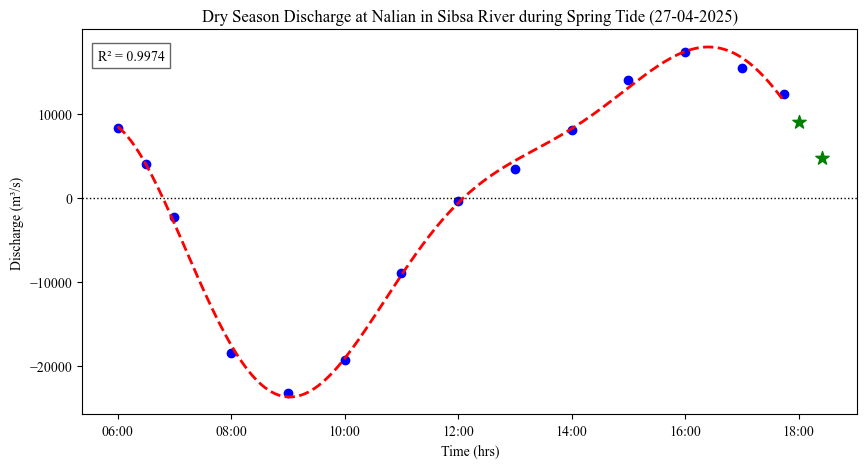

In [ ]:
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 10}

plt.rc('font', **font)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

plot1_h_axis = q_df['Date_Time']
plot1_v_axis = q_df['Discharge (m3/s)']

ax.scatter(plot1_h_axis, plot1_v_axis, marker='o', color='blue', label='Observed Discharge')
ax.axhline(0, color='black', linewidth=1, linestyle='dotted', c='black')
ax.set_xlabel('Time (hrs)')
ax.set_ylabel('Discharge (m\u00b3/s)')
time_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(time_format)
ax.set_title(f'Dry Season Discharge at {station_name} in {river_name} River during {tidal_phase} Tide ({mesurement_date})')

# Fitted sine curve
ax.plot(time_smooth_3, fitted_discharge_3, color='red', linewidth=2, linestyle='--', label='Sine Fit')

# Forecasted Discharge
ax.scatter(added_time_list, forecasted_discharge, color='green', marker= '*', s=100, label='Forecasted Discharge')

# Annotate R² in the top-left corner
ax.text(0.02, 0.95, f'R\u00b2 = {r_squared:.4f}', transform=ax.transAxes,
        fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

fig.savefig(r"..\Output\Full_Cycle_Discharge\{}_{}_{}_Forecast.jpg".format(river_name, tidal_phase, station_name), bbox_inches='tight', dpi=300)

In [23]:
mq_df.to_excel(r"..\Output\Full_Cycle_Discharge\{}_{}_{}_with_Forecast.xlsx".format(river_name, tidal_phase, station_name), index=False)